In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

C:\Users\Sam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%matplotlib inline

In [11]:
%aimport Model_PCA

# Question 1

## 1. PCA

In [4]:
df = pd.read_csv("..\\..\\dataQ1.csv")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

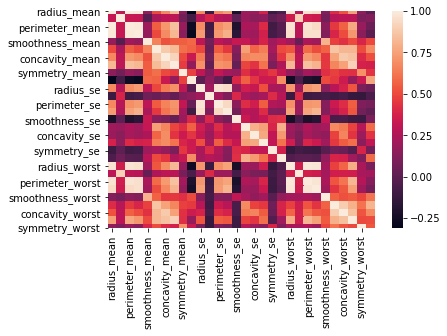

In [7]:
corr = df.corr()
sns.heatmap(corr)

In [8]:
X = df.drop('diagnosis', axis=1).values

-------------------------------------------------

In [14]:
pca = Model_PCA.PCA(n_components = 17)
X_projected = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio()
explained_var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783,
       0.00266209, 0.00197997])

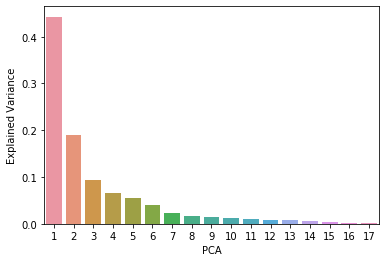

In [15]:
sns.barplot(np.arange(1, len(explained_var)+1,1), explained_var)
plt.xlabel("PCA")
plt.ylabel("Explained Variance")
plt.show()

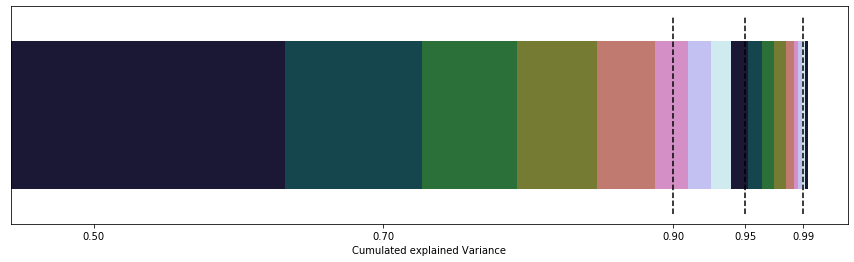

In [16]:
plt.figure(figsize=(15,4))
plt.barh(y = [0]*len(explained_var), width = explained_var, left=np.cumsum(explained_var),  height = [3]*len(explained_var),
         color=sns.color_palette("cubehelix", 8))
plt.vlines([0.90,0.95, 0.99], ymin=-2, ymax=2, linestyles='--')
plt.xlabel("Cumulated explained Variance")
plt.yticks([])
plt.xticks([0.5, 0.7, 0.9, 0.95, 0.99])
plt.show()

In [17]:
print("0.90% explained var: ", sum(np.cumsum(explained_var) < 0.9), " variables")
print("0.95% explained var: ", sum(np.cumsum(explained_var) < 0.95), " variables")
print("0.99% explained var: ", sum(np.cumsum(explained_var) < 0.99), " variables")

0.90% explained var:  6  variables
0.95% explained var:  9  variables
0.99% explained var:  16  variables


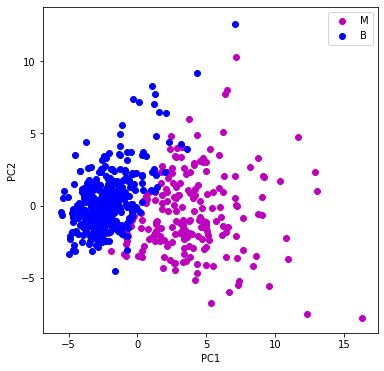

In [18]:
f, ax = plt.subplots(figsize=(6,6))

for d in df["diagnosis"].unique():
    
    idx = np.where(df['diagnosis'] == d)
    tmp = X_projected[idx]
    ax.scatter(tmp[:,0], tmp[:,1], color=d.lower(), label=d)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.legend()
plt.show()

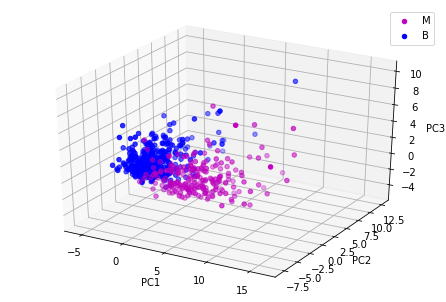

In [19]:
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure()
ax = p3.Axes3D(fig)

for d in df["diagnosis"].unique():
    
    idx = np.where(df['diagnosis'] == d)
    tmp = X_projected[idx]
    ax.scatter(tmp[:,0], tmp[:,1], tmp[:,2], color=d.lower(), label=d)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend()
plt.show()

## 2. Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### KMeans

In [21]:
S = 'Silhouette Measure & '
for K in [2, 3, 5, 10]:
    sklearn_kmean = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
    sklearn_kmean.fit(X_scaled)
    S += str(round(silhouette_score(X_scaled, sklearn_kmean.labels_), 2))
    S += " & "
print(S)


Silhouette Measure & 0.34 & 0.31 & 0.18 & 0.14 & 


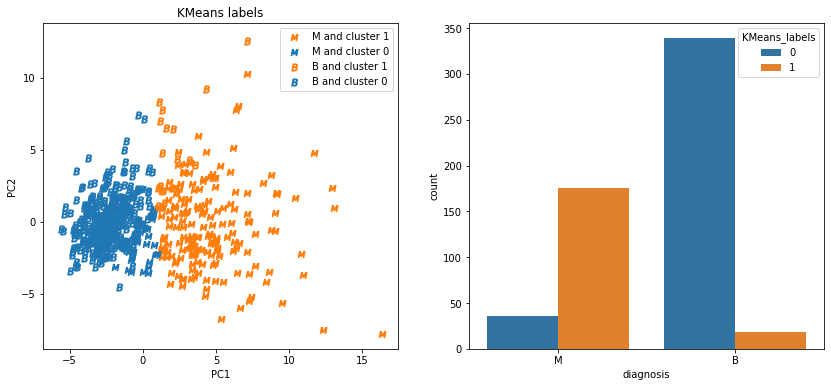

In [22]:
sklearn_kmean = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
df["KMeans_labels"] = sklearn_kmean.fit_predict(X_scaled)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

markers = ['o', '+']
colors = sns.color_palette()
for d in df['diagnosis'].unique():
    
    for lb in df['KMeans_labels'].unique():
        idx1 = df.loc[(df['diagnosis']==d) & (df['KMeans_labels']==lb)].index.values
        tmp1 = X_projected[idx1]
        ax1.scatter(tmp1[:,0], tmp1[:,1], color=colors[lb], marker = "${}$".format(d), label=d + ' and cluster '+ str(lb), s=50)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax1.set_title("KMeans labels")

ax1.legend()

sns.countplot(x='diagnosis', hue="KMeans_labels", data=df)
plt.show()

### Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
linkage_criterias = ["ward", "complete", "average", "single"]
for lk_cri in linkage_criterias:
    aggl_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=lk_cri, distance_threshold=None)
    aggl_cluster.fit(X_scaled)
    df['Agglomerative_labels_'+lk_cri] = aggl_cluster.labels_

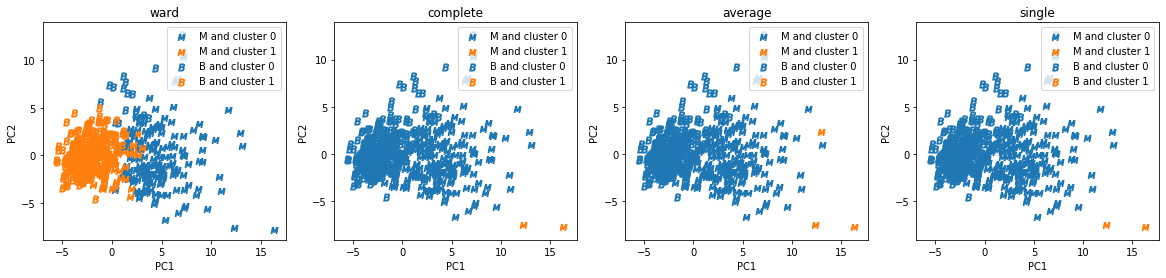

In [25]:
f, axes = plt.subplots(nrows=1, ncols=4, figsize = (20,4))
axes = axes.flatten()

markers = ['o', '+']
colors = sns.color_palette()
i=0
for lk_cri in linkage_criterias:
    ax = axes[i]
    i+=1
    for d in df['diagnosis'].unique():
        for lb in df['Agglomerative_labels_'+lk_cri].unique():
            idx1 = df.loc[(df['diagnosis']==d) & (df['Agglomerative_labels_'+lk_cri]==lb)].index.values
            tmp1 = X_projected[idx1]
            ax.scatter(tmp1[:,0], tmp1[:,1], color=colors[lb],
                            marker = "${}$".format(d), label=d + ' and cluster '+ str(lb), s=50)
    ax.set_title(lk_cri)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()

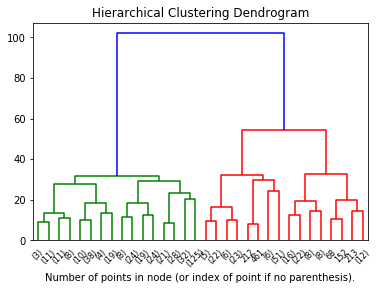

In [30]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Comparisons

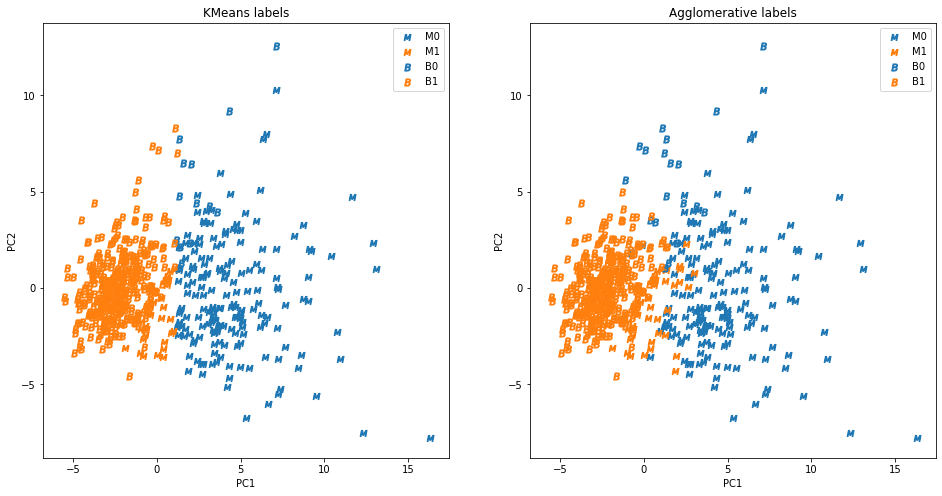

In [56]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16, 8))

markers = ['o', '+']
colors = sns.color_palette()
for d in df['diagnosis'].unique():
    
    for lb in df['KMeans_labels'].unique():
        idx1 = df.loc[(df['diagnosis']==d) & (df['KMeans_labels']==lb)].index.values
        tmp1 = X_projected[idx1]
        ax1.scatter(tmp1[:,0], tmp1[:,1], color=colors[lb], marker = "${}$".format(d), label=d + str(lb), s=50)

    for lb in df['Agglomerative_labels'].unique():
        idx2 = df.loc[(df['diagnosis']==d) & (df['Agglomerative_labels']==lb)].index.values
        tmp2 = X_projected[idx2]
        ax2.scatter(tmp2[:,0], tmp2[:,1], color=colors[lb],  marker = "${}$".format(d), label = d + str(lb), s=50)   

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

ax1.set_title("KMeans labels")
ax2.set_title("Agglomerative labels")

ax1.legend()
ax2.legend()

plt.show()

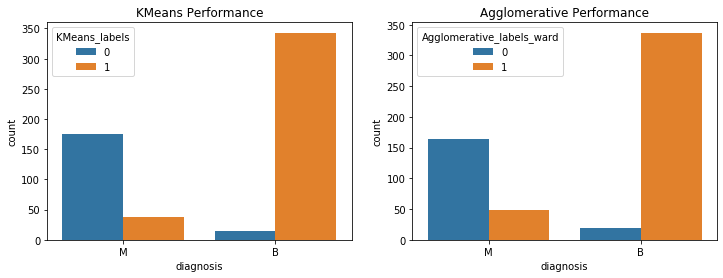

In [57]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.countplot(df['diagnosis'], hue=df['KMeans_labels'], ax=ax1)
sns.countplot(df['diagnosis'], hue=df['Agglomerative_labels_ward'], ax=ax2)
ax1.set_title("KMeans Performance")
ax2.set_title("Agglomerative Performance")
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

In [61]:
df['diagnosis_encoded'] = df['diagnosis'].map({'M':1, 'B':0})

df['KMeans_labels_inv'] = 1 - df['KMeans_labels']
df['Agglomerative_labels_ward_inv'] = 1 - df['Agglomerative_labels_ward']

In [66]:
print("KMEANS results")
cm = pd.DataFrame(data=confusion_matrix(df['diagnosis_encoded'], df['KMeans_labels_inv']),
                                       columns = ['Predicted B', 'Predicted M'],
                                       index = ['True B', 'True M'])
print(cm)
print('recall :', recall_score(df['diagnosis_encoded'], df['KMeans_labels_inv']))
print('precision: ', precision_score(df['diagnosis_encoded'], df['KMeans_labels_inv']))

KMEANS results
        Predicted B  Predicted M
True B          343           14
True M           37          175
recall : 0.8254716981132075
precision:  0.9259259259259259


In [67]:
175 / (37+175)

0.8254716981132075

In [70]:
print("Agglomerative results")
cm = pd.DataFrame(data=confusion_matrix(df['diagnosis_encoded'], df['Agglomerative_labels_ward_inv']),
                                       columns = ['Predicted B', 'Predicted M'],
                                       index = ['True B', 'True M'])
print(cm)
print('recall :', recall_score(df['diagnosis_encoded'], df['Agglomerative_labels_ward_inv']))
print('precision: ', precision_score(df['diagnosis_encoded'], df['Agglomerative_labels_ward_inv']))

Agglomerative results
        Predicted B  Predicted M
True B          337           20
True M           48          164
recall : 0.7735849056603774
precision:  0.8913043478260869


In [71]:
164/ (164+48)

0.7735849056603774